Lo más importante es empezar con el
# Análisis y Limpieza de Datos

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_csv("data_evaluacion.csv")

In [3]:
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
#Le añado nombres a las columnas para poder identificarlas mejor, hay ciertos componentes que no tengo idea de qué tratan así que los nombro como comp#
df.columns = ['edad', 'institucion-trabajo', 'comp1', 'estudios', 'comp2',
              'estado-civil', 'ocupacion', 'relacion-familiar', 'raza',
              'genero', 'comp3', 'comp4', 'horas-semana', 'pais', 'ingresos-anuales']
df.head()


,edad,institucion-trabajo,comp1,estudios,comp2,estado-civil,ocupacion,relacion-familiar,raza,genero,comp3,comp4,horas-semana,pais,ingresos-anuales
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(48841, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   edad                 48841 non-null  int64 
 1   institucion-trabajo  48841 non-null  object
 2   comp1                48841 non-null  int64 
 3   estudios             48841 non-null  object
 4   comp2                48841 non-null  int64 
 5   estado-civil         48841 non-null  object
 6   ocupacion            48841 non-null  object
 7   relacion-familiar    48841 non-null  object
 8   raza                 48841 non-null  object
 9   genero               48841 non-null  object
 10  comp3                48841 non-null  int64 
 11  comp4                48841 non-null  int64 
 12  horas-semana         48841 non-null  int64 
 13  pais                 48841 non-null  object
 14  ingresos-anuales     48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#Voy a identificar si existen datos duplicados, y si los hay, los eliminamos.
def eliminar_duplicados(df):
  print("Número de filas duplicadas: ", df.duplicated().sum())
  if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Nuevo número de filas: ", df.shape[0])
  else:
    print("No hay filas duplicadas.")
  return df

df = eliminar_duplicados(df)


Número de filas duplicadas:  52
Nuevo número de filas:  48789


In [8]:
filas_con_interrogacion = df[df.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]
num_filas_con_interrogacion = filas_con_interrogacion.shape[0]
print("N° Filas con al menos un signo de interrogación:", num_filas_con_interrogacion)


N° Filas con al menos un signo de interrogación: 3615


In [9]:
#Me doy cuenta que son muchas filas entonces no puedo borrarlas como tal, por ende voy a cambiarlas con otro valor.
df[df == '?'] = np.nan
for col in ['institucion-trabajo', 'ocupacion', 'pais']:df[col].fillna(df[col].mode()[0], inplace=True)

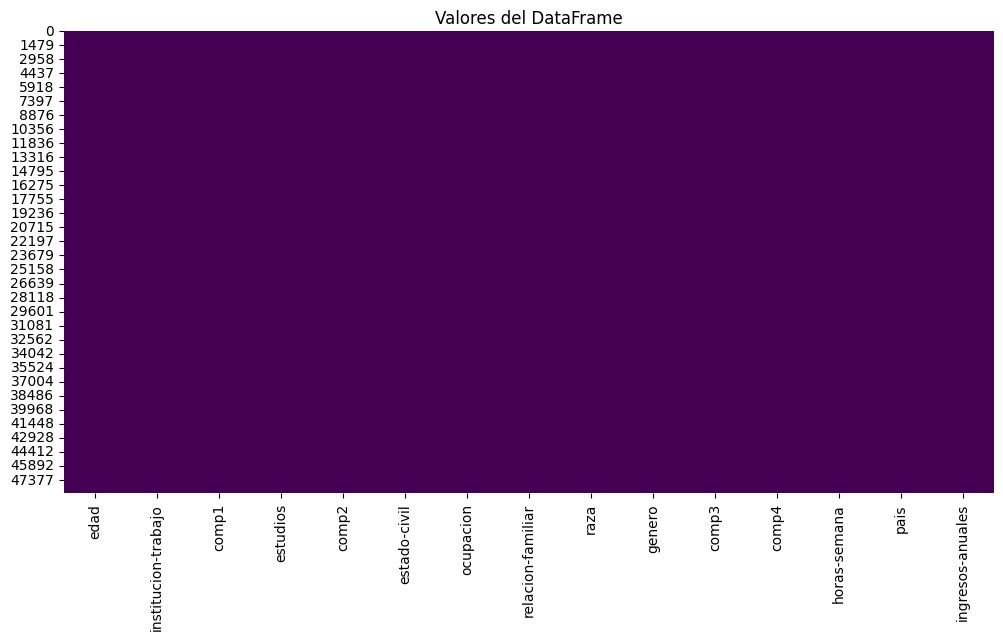

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores del DataFrame')
plt.show()


In [11]:
#Voy a obtener ahora información general de cómo se relacionan los datos entre sí de mi dataframe con los datos que no son objetos
df.describe()

,edad,comp1,comp2,comp3,comp4,horas-semana
count,48789.000000,4.878900e+04,48789.000000,48789.000000,48789.000000,48789.000000
mean,38.652791,1.896713e+05,10.078747,1080.195269,87.597368,40.425895
std,13.708633,1.056171e+05,2.570038,7455.980687,403.213066,12.392856
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376080e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#Voy a obtener ahora información general de cómo se relacionan los datos entre sí de mi dataframe que son objetos
df.describe(include='object')

,institucion-trabajo,estudios,estado-civil,ocupacion,relacion-familiar,raza,genero,pais,ingresos-anuales
count,48789,48789,48789,48789,48789,48789,48789,48789,48789
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36655,15770,22366,8970,19703,41713,32613,44647,37108


In [13]:
#Para poder manejar mejor mis datos nos dimos cuenta que en el apartado relacion-familiar, tenemos Husband a Wife y eso puede generar dispersión en los datos pero al final son lo mismo
#Entonces voy a unificar ambos como Casado -> Married y así evitar la dispersión, porque al final son lo mismo y me permite obtener una precisión más alta
df['relacion-familiar'] = df['relacion-familiar'].replace(['Wife','Husband'],'Married')

In [14]:
#Voy a analizar la manera en la que puedo encodear y organizar mis datos de estado civil
df['estado-civil'].value_counts()
df.head(20)

,edad,institucion-trabajo,comp1,estudios,comp2,estado-civil,ocupacion,relacion-familiar,raza,genero,comp3,comp4,horas-semana,pais,ingresos-anuales
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Married,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Married,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Married,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Married,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Married,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Married,Black,Male,0,0,80,United-States,>50K


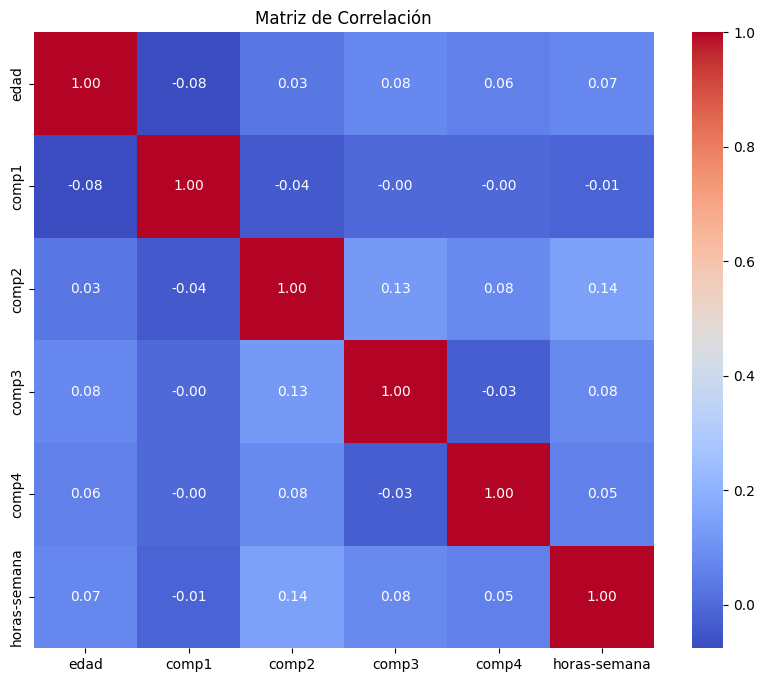

In [15]:
#Voy a ver mediante una matriz de correlación qué tanta relación tienen mis valores numéricos
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [16]:
#Empiezo encodeando mis valores objetivo, en este caso 1 -> Gana más o igual a 50k al año, caso 2-> Gana menos de 50K al año
df['ingresos-anuales'] = df['ingresos-anuales'].apply(lambda x: 1 if x == '<=50K' else 0)


In [17]:
#Mediante un encoding voy a codificar mis variables categóricas para convertirlas en numéricas, en este caso se aplican a todas las filas que no son números
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']):
  df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   edad  institucion-trabajo   comp1  estudios  comp2  estado-civil  \
0    50                    5   83311         9     13             2   
1    38                    3  215646        11      9             0   
2    53                    3  234721         1      7             2   
3    28                    3  338409         9     13             2   
4    37                    3  284582        12     14             2   

   ocupacion  relacion-familiar  raza  genero  comp3  comp4  horas-semana  \
0          3                  0     4       1      0      0            13   
1          5                  1     4       1      0      0            40   
2          5                  0     2       1      0      0            40   
3          9                  0     2       0      0      0            40   
4          3                  0     4       0      0      0            40   

   pais  ingresos-anuales  
0    38                 1  
1    38                 1  
2    38                 1 

In [18]:
df.head(20)

,edad,institucion-trabajo,comp1,estudios,comp2,estado-civil,ocupacion,relacion-familiar,raza,genero,comp3,comp4,horas-semana,pais,ingresos-anuales
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,1
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,1
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,1
3,28,3,338409,9,13,2,9,0,2,0,0,0,40,4,1
4,37,3,284582,12,14,2,3,0,4,0,0,0,40,38,1
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,1
6,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,0
7,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,0
8,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,0
9,37,3,280464,15,10,2,3,0,2,1,0,0,80,38,0


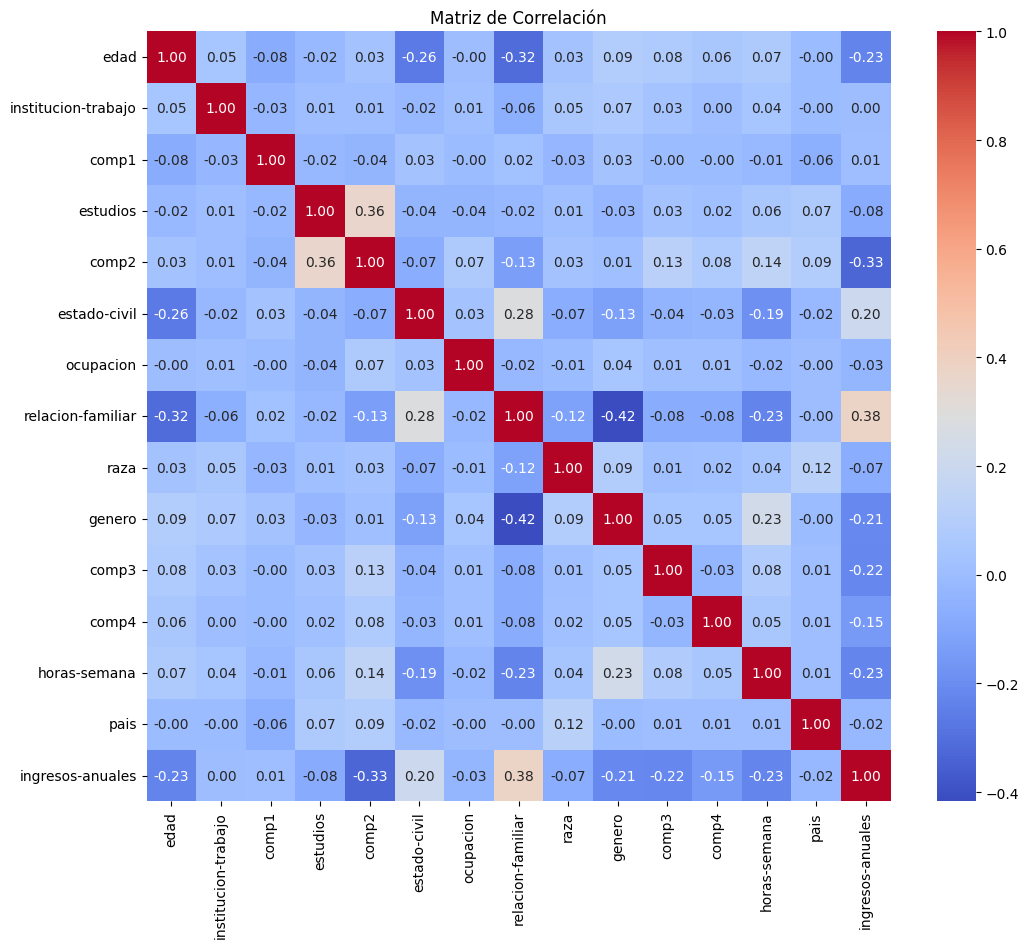

In [19]:
#Tengo todo encodeado, entonces genero una matriz de correlación final para analizar cómo se relacionan las variables.
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
#Me doy cuenta que no existe una correlación fuerte entre las variables, pero al cambiar Husband/Wife por Married obtenemos una correlación mayor.

In [20]:
#Voy a normalizar todos mis datos:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_normalized.head())


       edad  institucion-trabajo     comp1  estudios     comp2  estado-civil  \
0  0.452055             0.714286  0.048052  0.600000  0.800000      0.333333   
1  0.287671             0.428571  0.137581  0.733333  0.533333      0.000000   
2  0.493151             0.428571  0.150486  0.066667  0.400000      0.333333   
3  0.150685             0.428571  0.220635  0.600000  0.800000      0.333333   
4  0.273973             0.428571  0.184219  0.800000  0.866667      0.333333   

   ocupacion  relacion-familiar  raza  genero  comp3  comp4  horas-semana  \
0   0.230769               0.00   1.0     1.0    0.0    0.0      0.122449   
1   0.384615               0.25   1.0     1.0    0.0    0.0      0.397959   
2   0.384615               0.00   0.5     1.0    0.0    0.0      0.397959   
3   0.692308               0.00   0.5     0.0    0.0    0.0      0.397959   
4   0.230769               0.00   1.0     0.0    0.0    0.0      0.397959   

   pais  ingresos-anuales  
0  0.95               1.0  


In [21]:
#Puesto que no conozco sobre qué se refieren los comp#, y no presentan una correlación fuerte entre los datos

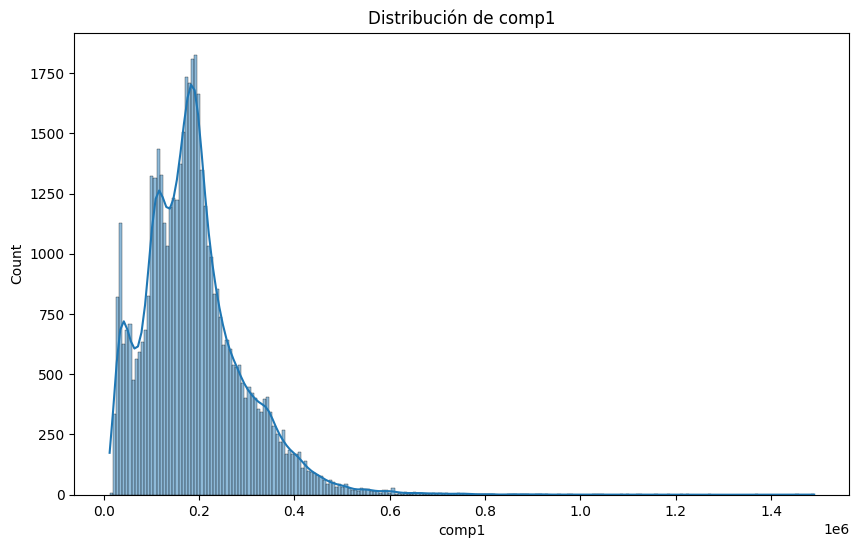

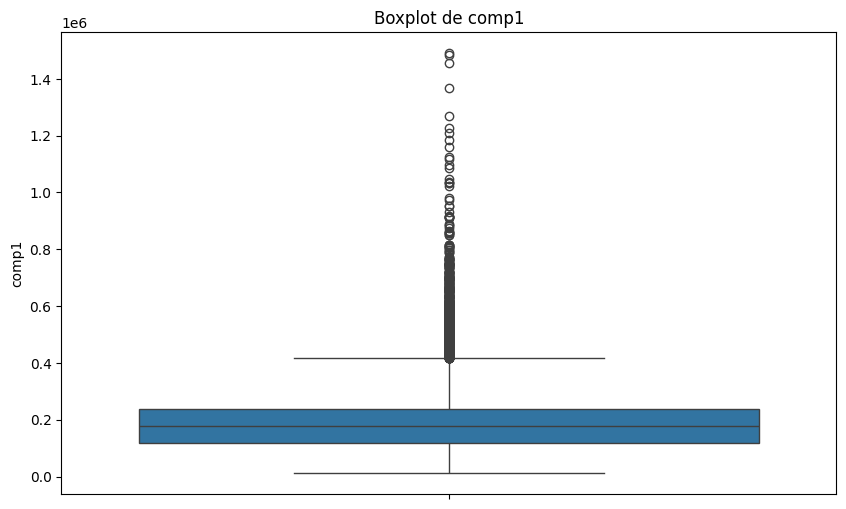

Media de comp1: 189671.29809998156
Moda de comp1: 203488


In [22]:
# Para decidir si usar la media o la moda para llenar los valores faltantes en 'comp1',
# primero debemos entender la distribución de los datos y si hay valores atípicos.

plt.figure(figsize=(10, 6))
sns.histplot(df['comp1'], kde=True)
plt.title('Distribución de comp1')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['comp1'])
plt.title('Boxplot de comp1')
plt.show()


media_comp1 = df['comp1'].mean()
moda_comp1 = df['comp1'].mode()[0]

print("Media de comp1:", media_comp1)
print("Moda de comp1:", moda_comp1)


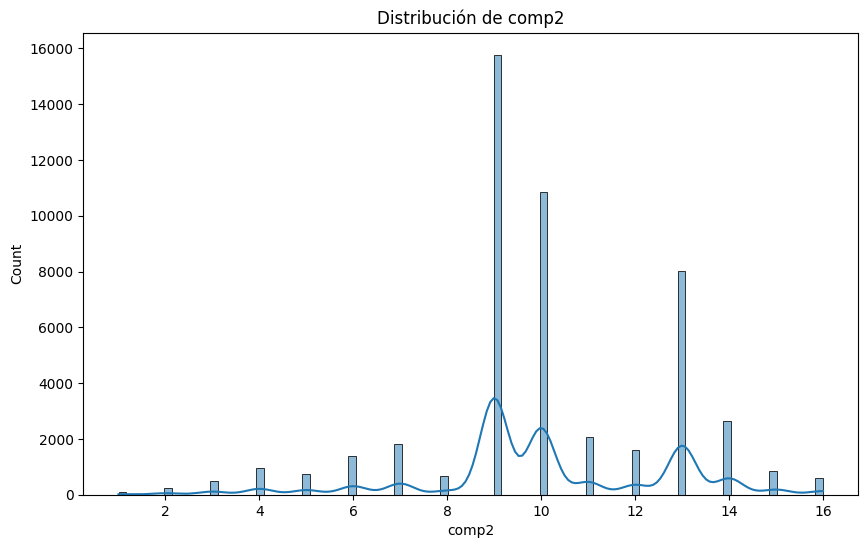

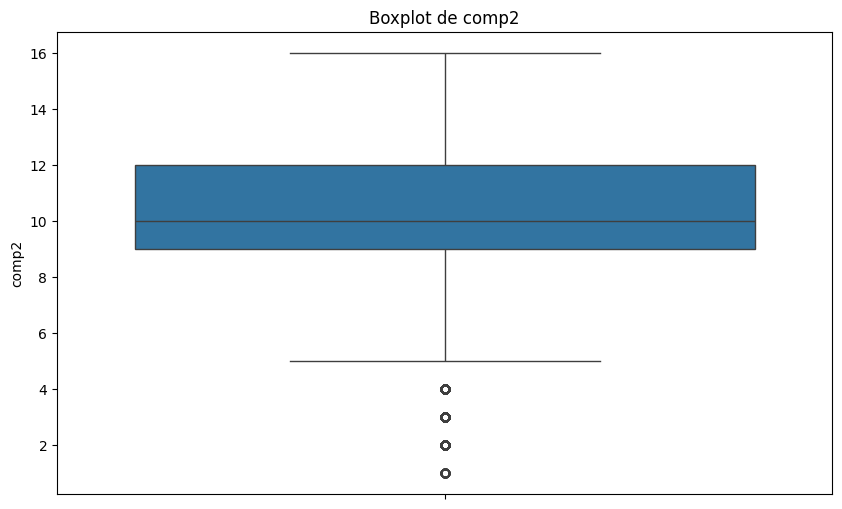

Media de comp2: 10.078747258603373
Moda de comp2: 9
Valores más frecuentes:
 comp2
9     15770
10    10863
13     8012
14     2656
11     2060
Name: count, dtype: int64


In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['comp2'], kde=True)
plt.title('Distribución de comp2')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['comp2'])
plt.title('Boxplot de comp2')
plt.show()

media_comp2 = df['comp2'].mean()
moda_comp2 = df['comp2'].mode()[0]

print("Media de comp2:", media_comp2)
print("Moda de comp2:", moda_comp2)

conteo_valores = df['comp2'].value_counts()
print("Valores más frecuentes:\n", conteo_valores.head())


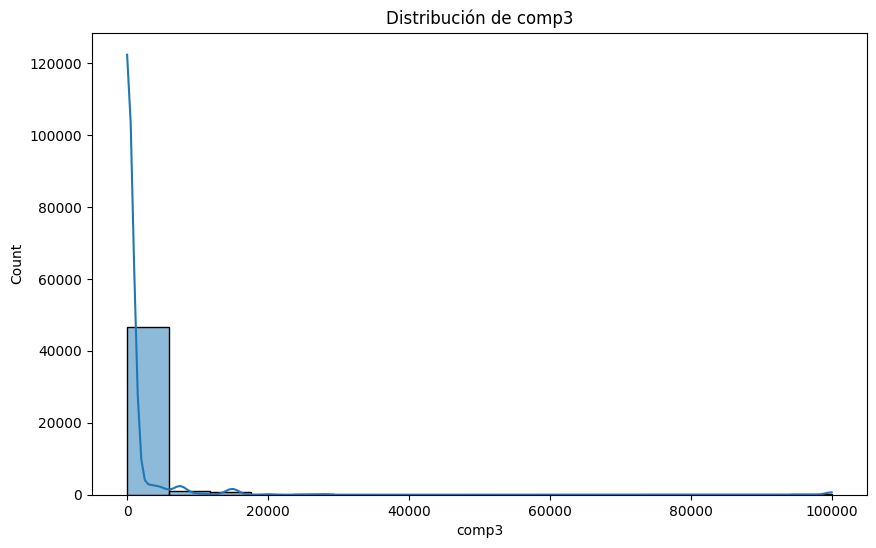

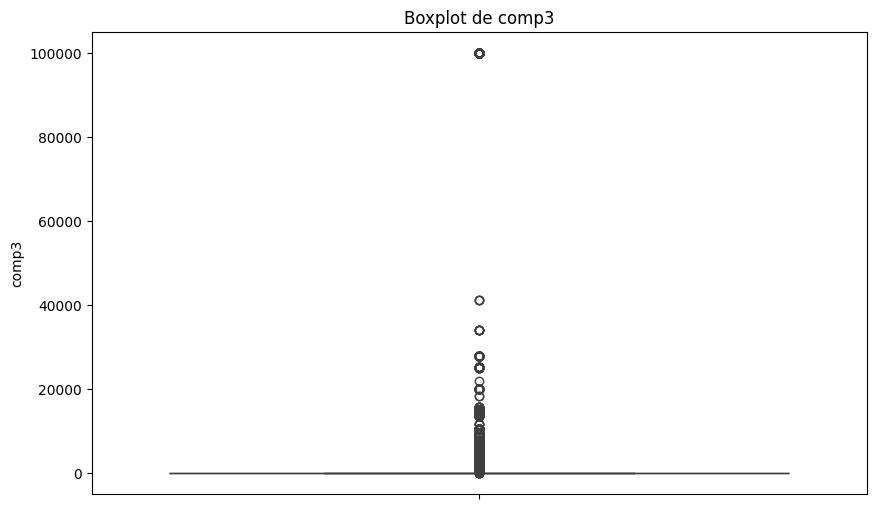

Media de comp3: 1080.1952694254853
Moda de comp3: 0

Valores más repetidos en 'comp3':
comp3
0        44755
15024      513
7688       410
7298       364
99999      244
3103       152
5178       146
5013       117
4386       108
8614        82
Name: count, dtype: int64


In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['comp3'], kde=True)
plt.title('Distribución de comp3')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['comp3'])
plt.title('Boxplot de comp3')
plt.show()

media_comp3 = df['comp3'].mean()
moda_comp3 = df['comp3'].mode()[0]

print("Media de comp3:", media_comp3)
print("Moda de comp3:", moda_comp3)

print("\nValores más repetidos en 'comp3':")
print(df['comp3'].value_counts().head(10))

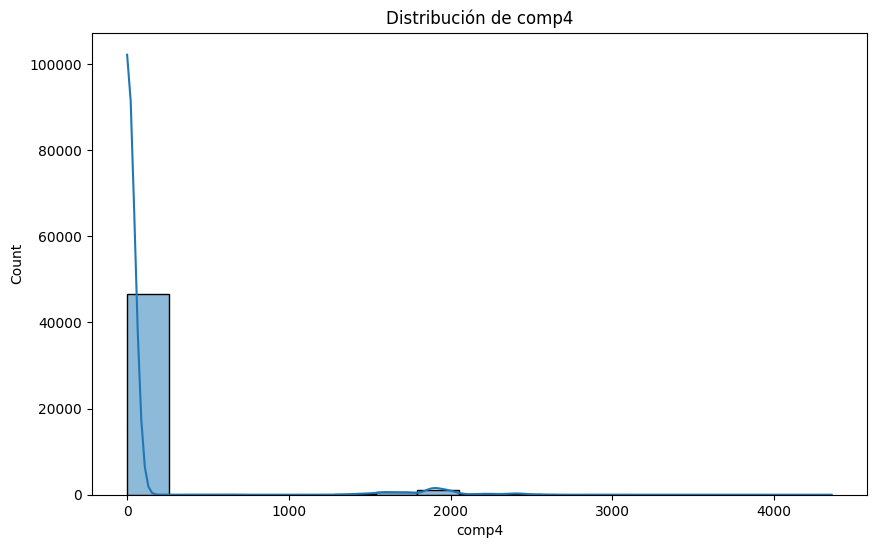

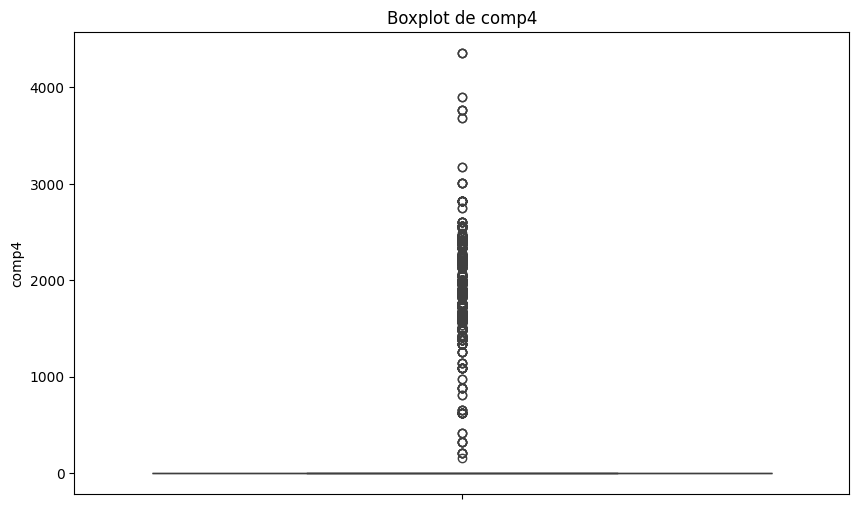

Media de comp4: 87.59736825923876
Mediana de comp4: 0.0
Moda de comp4: 0

Valores más repetidos en 'comp4':
comp4
0       46507
1902      304
1977      253
1887      233
2415       72
1485       71
1848       67
1590       62
1602       62
1876       59
Name: count, dtype: int64


In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['comp4'], kde=True)
plt.title('Distribución de comp4')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(df['comp4'])
plt.title('Boxplot de comp4')
plt.show()

media_comp4 = df['comp4'].mean()
mediana_comp4 = df['comp4'].median()
moda_comp4 = df['comp4'].mode()[0]

print("Media de comp4:", media_comp4)
print("Mediana de comp4:", mediana_comp4)
print("Moda de comp4:", moda_comp4)

print("\nValores más repetidos en 'comp4':")
print(df['comp4'].value_counts().head(10))

### Este análisis de compN° se hace porque:
No conocemos a qué exactamente pertenecen estos componentes, por ende a la hora de crear la interfaz gráfica y el despliegue no podemos pedirle llenar al usuario con dichos datos, por ende en base a los gráficos para:
1. comp1: Vamos a llenar automáticamente con la media
2. comp2: Vamos a llenar automáticamente con la media.
3. comp3: Vamos a llenar automáticamente con la moda.
4. comp4: Vamos a llenar automáticamente con la moda.

In [26]:
def exportar_df_a_csv(df, nombre_archivo):
  """
  Exporta un DataFrame de pandas a un archivo CSV.

  Args:
    df: El DataFrame a exportar.
    nombre_archivo: El nombre del archivo CSV a crear.
  """
  df.to_csv(nombre_archivo, index=False)
  print(f"DataFrame exportado a '{nombre_archivo}' con éxito.")

exportar_df_a_csv(df, 'databaseFinal.csv')


DataFrame exportado a 'databaseFinal.csv' con éxito.


In [27]:
data = pd.read_csv("databaseFinal.csv")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['ingresos-anuales'])
y = data['ingresos-anuales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39031, 14), (9758, 14), (39031,), (9758,))

# ENTRENO MI MODELO

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[kernel] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report
    }

    print(f'Kernel: {kernel}')
    print(f'Precisión: {accuracy}')
    print('Matriz Confusión:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)
    print('------------------------------------')
